In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
df = pd.read_table('log.intEnergy')
df.head()

,units metal
0,dimension 3
1,boundary p p p
2,atom_style atomic
3,#atom_modify map array
4,#----------------- CREATE ATOMS --------------...


In [105]:
fileName = "log.intEnergy"
runNum = 1

search = "Step"
n = 1
f = open(fileName)
df = {}
EOF = False
while True:
    try:
        line = f.readline()
    except:
        break
    if search in line:
        if n == runNum:
            keys = line.split()
            for key in keys:
                df[key] = []
            while True:
                try:
                    line = f.readline()
                except:
                    EOF = True
                    break
                try:
                    values = list(float(x) for x in line.split())
                except:
                    break
                for i in range(len(keys)):
                    df[keys[i]].append(values[i])
        else:
            n += 1
    else:
        pass
    if len(df.keys()) > 0 or EOF:
        break
df = pd.DataFrame(df)
f.close()
print(df)

     Step   Atoms  Temp        Press     TotEng
0     0.0  1000.0   0.0  484186.1700  6740.3218
1    10.0  1000.0   0.0  277698.1400 -1069.3302
2    20.0  1000.0   0.0   84105.3300 -3015.9316
3    30.0  1000.0   0.0   13254.2960 -3401.2890
4    40.0  1000.0   0.0   -5279.7276 -3492.8141
5    50.0  1000.0   0.0  -10856.0590 -3529.5247
6    60.0  1000.0   0.0  -12720.6410 -3551.5067
7    70.0  1000.0   0.0  -12915.4910 -3563.2598
8    80.0  1000.0   0.0  -13037.2920 -3569.3223
9    90.0  1000.0   0.0  -13085.6590 -3573.5382
10  100.0  1000.0   0.0  -12882.9860 -3576.4317
11  110.0  1000.0   0.0  -12594.9830 -3579.3503
12  120.0  1000.0   0.0  -12200.7220 -3581.8387
13  130.0  1000.0   0.0  -12193.3060 -3583.6194
14  140.0  1000.0   0.0  -11901.1430 -3584.8263
15  150.0  1000.0   0.0  -11649.3440 -3585.5644
16  160.0  1000.0   0.0  -11305.9360 -3586.6172
17  170.0  1000.0   0.0  -11537.6690 -3587.3740
18  180.0  1000.0   0.0  -11912.9300 -3587.6238
19  190.0  1000.0   0.0  -11691.2440 -35

# Working Log file Reader 

test code for class


In [106]:
filename = 'log.intEnergy'   #takes in filename
thermoLabels = 'Step Atoms Temp Press TotEng'.split()    #take in thermo output Labels/arguements
includeLabelsForNewRun = False

dataLines = []

f = open(filename,'r')
data = False
for line in f.readlines():
    #print(line.split())
    
    if data:
        if len(line.split())!= 0 and line.split()[0].isdigit():
            dataLines.append(line.split())
        else:
            data = False
    
    if line.split() == thermoLabels:
        data = True
        if includeLabelsForNewRun:
            dataLines.append(line.split())
    
f.close()

for i in dataLines:
    print(i)

#print(outputLabels)

['0', '1000', '0', '484186.17', '6740.3218']
['10', '1000', '0', '277698.14', '-1069.3302']
['20', '1000', '0', '84105.33', '-3015.9316']
['30', '1000', '0', '13254.296', '-3401.289']
['40', '1000', '0', '-5279.7276', '-3492.8141']
['50', '1000', '0', '-10856.059', '-3529.5247']
['60', '1000', '0', '-12720.641', '-3551.5067']
['70', '1000', '0', '-12915.491', '-3563.2598']
['80', '1000', '0', '-13037.292', '-3569.3223']
['90', '1000', '0', '-13085.659', '-3573.5382']
['100', '1000', '0', '-12882.986', '-3576.4317']
['110', '1000', '0', '-12594.983', '-3579.3503']
['120', '1000', '0', '-12200.722', '-3581.8387']
['130', '1000', '0', '-12193.306', '-3583.6194']
['140', '1000', '0', '-11901.143', '-3584.8263']
['150', '1000', '0', '-11649.344', '-3585.5644']
['160', '1000', '0', '-11305.936', '-3586.6172']
['170', '1000', '0', '-11537.669', '-3587.374']
['180', '1000', '0', '-11912.93', '-3587.6238']
['190', '1000', '0', '-11691.244', '-3587.8262']
['200', '1000', '0', '-11637.955', '-358

In [107]:
df = pd.DataFrame(dataLines,columns=thermoLabels)
#print(df)

Actual Reader Class

In [108]:
class LogReader:
    def __init__(self,filename,thermoLabels):
        self.var = "holder"
        self.filename = filename
        self.thermoLabels = thermoLabels.split()
    
    # get lines of thermo output data as list of lines
    def dataExtracter(self,includeLabelsForNewRun=False):
        self.includeLabelsForNewRun = includeLabelsForNewRun

        dataLines = []
        
        f = open(filename,'r')
        isDataLine = False
        for line in f.readlines():
            if isDataLine:
                if len(line.split())!= 0 and line.split()[0].isdigit():
                    dataLines.append(line.split())
                else:
                    isDataLine = False
            
            if line.split() == self.thermoLabels:
                isDataLine = True
                if includeLabelsForNewRun:     #used to seperate runs by thermoLabels
                    dataLines.append(line.split())

        f.close()
        return dataLines

    #User method to get dataframe from log data
    def getDataFrame(self,seperateRunsByThermoLabels=False):
        return pd.DataFrame(self.dataExtracter(seperateRunsByThermoLabels),columns=self.thermoLabels)

In [109]:
reader = LogReader('log.Bulkmod','Step Atoms Temp Press TotEng')
df = reader.getDataFrame()
print(reader.getDataFrame())

       Step Atoms       Temp       Press      TotEng
0         0  1000          0   484186.17   6740.3218
1        10  1000          0   277698.14  -1069.3302
2        20  1000          0    84105.33  -3015.9316
3        30  1000          0   13254.296   -3401.289
4        40  1000          0  -5279.7276  -3492.8141
5        50  1000          0  -10856.059  -3529.5247
6        60  1000          0  -12720.641  -3551.5067
7        70  1000          0  -12915.491  -3563.2598
8        80  1000          0  -13037.292  -3569.3223
9        90  1000          0  -13085.659  -3573.5382
10      100  1000          0  -12882.986  -3576.4317
11      110  1000          0  -12594.983  -3579.3503
12      120  1000          0  -12200.722  -3581.8387
13      130  1000          0  -12193.306  -3583.6194
14      140  1000          0  -11901.143  -3584.8263
15      150  1000          0  -11649.344  -3585.5644
16      160  1000          0  -11305.936  -3586.6172
17      170  1000          0  -11537.669   -35

# Working Grapher

In [110]:
import numpy as np
import matplotlib.pyplot as plt

#collection of methods that analyze dataframe data
class LogAnalyzer:
    def __init__(self,dataframe,timestep=1):
        self.df = dataframe
        self.timestep = timestep
        
    def generalPlot(self,X,Y,xlabel='',ylabel='',title=''):
        plt.plot(X,Y)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        #plt.legend(loc='upper left')
        plt.grid()
        plt.show()
        
    def plotColumn(self,columnLabel):
        Y = self.df[columnLabel].values.astype(float)
        X = np.linspace(0,self.timestep*len(Y),len(Y))
        self.generalPlot(X,Y,'Runtime',columnLabel)

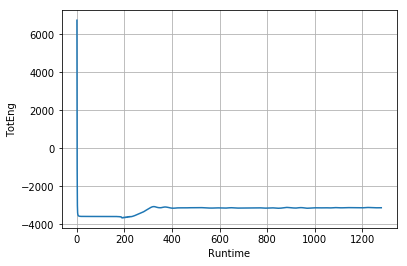

In [111]:
LA = LogAnalyzer(df)
LA.plotColumn('TotEng')


# Reading position vectors from dump files; Working DumpReader class



#implementation assumes that atom ids are in same order for each run, seems to be the case need to confirm 

In [112]:

class DumpReader:
    def __init__(self,filename, outputLabels = ''):
        self.filename = filename
        self.outputLabels = ('ITEM: ATOMS '+ outputLabels).split()
    
    def dataExtracter(self):
        dataLines = []         # format : [[rowData1], [rowData2], [rowData3], ... ]
        self.idLabels = ['Timestep']      # format : ['Timestep', 'atomID', 'atomID', ... ]
        rowData = []                      # format : [[timestep], [x,y,z], [x,y,z], ... ]
        
        f = open(self.filename,'r')
        isFirstRun = True
        isDataLine = False          # when initially set, line in next iteration is a data line
        isTimestepLine = False      # when initially set, line in next iteration is a timestep line
        timestep = 0
        
        for line in f.readlines():  
            if line.strip() == 'ITEM: TIMESTEP' or isTimestepLine:
                if isTimestepLine:
                    isTimestepLine = False
                    timestep = int(line.split()[0])
                    rowData.append([timestep])
                    if timestep > 0:                 #assumes simulation starts at 0 timestep
                        isFirstRun = False
                else:
                    isTimestepLine = True
            
            if isDataLine:  
                data = line.split()
                if len(line.split())!= 0 and data[0].isdigit():   
                    if isFirstRun: 
                        self.idLabels.append(data[0])   # append label
                    rowData.append(line.split()[1:])   
                else:
                    isDataLine = False
                    dataLines.append(rowData)
                    rowData = []
            
            if line.split() == self.outputLabels:    
                isDataLine = True                     
                
        f.close()
        return dataLines

    #User method to get dataframe from log data
    def getDataframe(self):
        return pd.DataFrame(self.dataExtracter(),columns=self.idLabels)
    
    def getNdArray(self):
        data = self.dataExtracter()
        for row in range(len(data)):
            #data[row] = np.array(data[row])
            for col in range(len(data[row])):
                data[row][col] = np.array(data[row][col]).astype(float)
        return np.array(data)
'''
note, tried to build dataLines as np.array but since i consistently appending new data to rowData i 
have to make a new copy and reassign (very wasteful) 
instead trying building dataLines then converting elements to np.array by looping, (is there a more efficient
way to do this?)

'''


'\nnote, tried to build dataLines as np.array but since i consistently appending new data to rowData i \nhave to make a new copy and reassign (very wasteful) \ninstead trying building dataLines then converting elements to np.array by looping, (is there a more efficient\nway to do this?)\n\n'

code for testing/proof of concept 

In [113]:
names = ['Timestep','1r','2r','3r']
a = [[[10],[1,2,3],[1,2,3],[1,2,3]],
         [[20],[1,2,3],[1,2,3],[1,2,3]],
         [[30],[1,2,3],[1,2,3],[1,2,3]],
         [[40],[1,2,3],[1,2,3],[1,2,3]]]
ar = np.array([[[10],[1,2,3],[1,2,3],[1,2,3]],
         [[20],[1,2,3],[1,2,3],[1,2,3]],
         [[30],[1,2,3],[1,2,3],[1,2,3]],
         [[40],[1,2,3],[1,2,3],[1,2,3]]])
pd.DataFrame(ar,columns = names)

ar2 = np.array([])

for row in a:
    r = np.array([])
    for elem in row:
        np.append(r,np.array(elem))
        
    np.append(ar2,r)



In [114]:
#outputLabels = 'id x y z'
DR = DumpReader('pos.XYZ','id x y z')
print(DR.getDataframe())


     Timestep                                       1  \
0         [0]                               [0, 0, 0]   
1        [10]  [0.00322479, 0.000384552, 0.000222489]   
2        [20]     [0.0273091, 0.00271081, 0.00208536]   
3        [30]      [0.107622, 0.00256832, 0.00936374]   
4        [40]          [0.184812, 18.1473, 0.0121219]   
5        [50]          [0.250572, 18.1452, 0.0108031]   
6        [60]         [0.323135, 18.1438, 0.00959795]   
7        [70]         [0.356674, 18.1431, 0.00841891]   
8        [80]         [0.367106, 18.1425, 0.00700606]   
9        [90]         [0.366838, 18.1422, 0.00657664]   
10      [100]         [0.366891, 18.1422, 0.00659865]   
11      [110]         [0.366886, 18.1422, 0.00660845]   
12      [120]          [0.36686, 18.1422, 0.00660965]   
13      [130]         [0.366875, 18.1422, 0.00660633]   
14      [140]         [0.366876, 18.1422, 0.00660816]   
15      [150]          [0.36688, 18.1422, 0.00660328]   
16      [160]          [0.36688

# Edditable DumpReader2 class to implemented data extraction using ndarrays


In [115]:

class DumpReader2:
    def __init__(self,filename, outputLabels = ''):
        self.filename = filename
        self.outputLabels = ('ITEM: ATOMS '+ outputLabels).split()
    
    def dataExtracter(self):
        dataLines = []         # format : [[rowData1], [rowData2], [rowData3], ... ]
        self.idLabels = ['Timestep']      # format : ['Timestep', 'atomID', 'atomID', ... ]
        rowData = []                      # format : [[timestep], [x,y,z], [x,y,z], ... ]
        
        f = open(self.filename,'r')
        isFirstRun = True
        isDataLine = False          # when initially set, line in next iteration is a data line
        isTimestepLine = False      # when initially set, line in next iteration is a timestep line
        timestep = 0
        
        for line in f.readlines():  
            if line.strip() == 'ITEM: TIMESTEP' or isTimestepLine:
                if isTimestepLine:
                    isTimestepLine = False
                    timestep = int(line.split()[0])
                    rowData.append([timestep])
                    if timestep > 0:                 #assumes simulation starts at 0 timestep
                        isFirstRun = False
                else:
                    isTimestepLine = True
            
            if isDataLine:  
                data = line.split()
                if len(line.split())!= 0 and data[0].isdigit():   
                    if isFirstRun: 
                        self.idLabels.append(data[0])   # append label
                    rowData.append(line.split()[1:])   
                else:
                    isDataLine = False
                    dataLines.append(rowData)
                    rowData = []
            
            if line.split() == self.outputLabels:    
                isDataLine = True                     
                
        f.close()
        return dataLines

    #User method to get dataframe from log data
    def getDataframe(self):
        return pd.DataFrame(self.dataExtracter(),columns=self.idLabels)
    
    def getNdArray(self):
        return self.dataExtracter()
        



In [116]:
r = [[1],[1,2,3],[1,2,3]]
a = np.empty(0)
a = np.append(a,np.array([1,2,3]))
b = np.asarray(r)
for i in range(len(b)):
    b[i] = np.array(b[0])
    
print(b)

[array([1]) array([1]) array([1])]


# Function to check for convergence of data to a certain value; method of DataFileAnalyzer class


In [281]:
    import copy 
    
    def getConstValueList(self,columnLabel):
        yData = np.array(self.df[columnLabel].tolist())   # GET COLUMN DATA AS TARGET NDARRAY
        yGradient = np.gradient(yData)
        print(yGradient)
        
        
        #how to decide maxError?, minRange?
        
    def getConstValueList2(df,columnLabel,timestepInterval=10,maxError=.5,minRange=50):
        #thermo data is outputedevrey timestepInterval
        
        yData = np.array(df[columnLabel].tolist()).astype(float)   # GET COLUMN DATA AS TARGET NDARRAY
        #plt.plot(yData)
        yGradient = np.gradient(yData)     # timestep is conserved
        plt.plot(yGradient[20:])
        yGGradient = np.gradient(yGradient)   # timestep is conserved
        plt.plot(yGGradient[20:])
        
        #print(yData.shape,'   ',yGradient.shape,'   ',yGGradient.shape)
        
        constValueRanges= []
        
        lowRange = -1    # -1 mean var is not set
        uppRange = -1

        for ind in range(yGGradient.shape[0]):
            #print(ind,' ',yGGradient[ind], " low: ",lowRange," upp: ",uppRange)
            if lowRange != -1 and abs(yGGradient[ind]) < maxError:  # if lowRange is set, then can set uppRnge
                uppRange = ind
                if ind == (yGGradient.shape[0]-1):
                    constValueRanges.append([lowRange,uppRange])
                    
            elif lowRange != -1 and uppRange != -1 and (uppRange-lowRange) > minRange:
                #print(ind,' ',yGGradient[ind], " low: ",lowRange," upp: ",uppRange)
                constValueRanges.append([lowRange,uppRange])
                lowRange = -1    
                uppRange = -1
            
            if uppRange == -1 and abs(yGGradient[ind]) < maxError: # if uppRange is not set then can set lowRange
                lowRange = ind
        print(constValueRanges)
        return constValueRanges
    
# energy = np.mean(yData[constValueRange[0],constValueRange[1]])
        
    
       
        

[[10, 166], [171, 275], [281, 1279]]


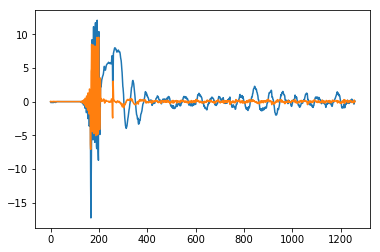

In [282]:
lst = getConstValueList2(df,'TotEng')

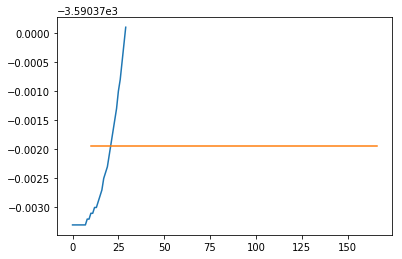

In [292]:
yData = np.array(df['TotEng'].tolist()).astype(float)[50:80]   # GET COLUMN DATA AS TARGET NDARRAY
plt.plot(yData)


for rang in lst:
    y=np.ones(rang[1]-rang[0]+1)*np.mean(yData[rang[0]:rang[1]])
    plt.plot(np.arange(rang[0],rang[1]+1),y)
    #print(y)
